9. Using SVM algorithm, predict if a patient has a benign tumor or malignant tumor (cancer) based on the features provided. Use the following kernel for the SVM algorithm:
a) Linear b) Polynomial c) RBF d) Sigmoid
Find the following metrics for each of the SVM algorithms:
1) Accuracy 2) Recall 3) Precision 4) F1-Score
5) Jaccard Score 6) Error rates 7) Confusion Matrix
Compare all four SVM models using an ROC curve.

training with linear kernel..
training with poly kernel..
training with rbf kernel..
training with sigmoid kernel..


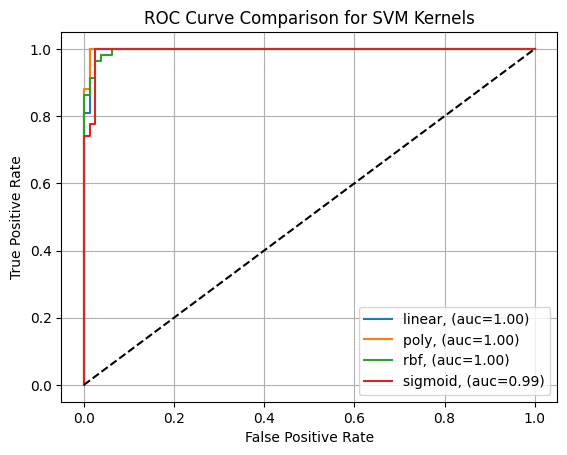

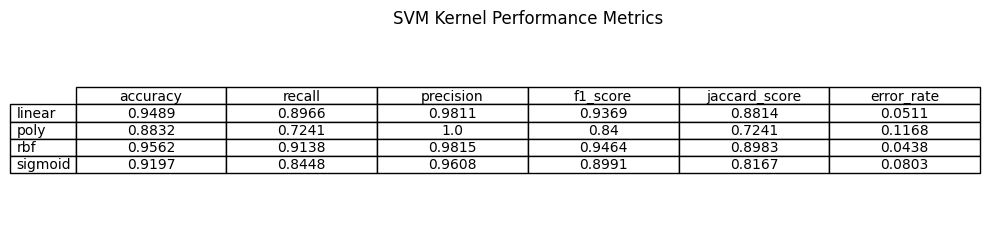

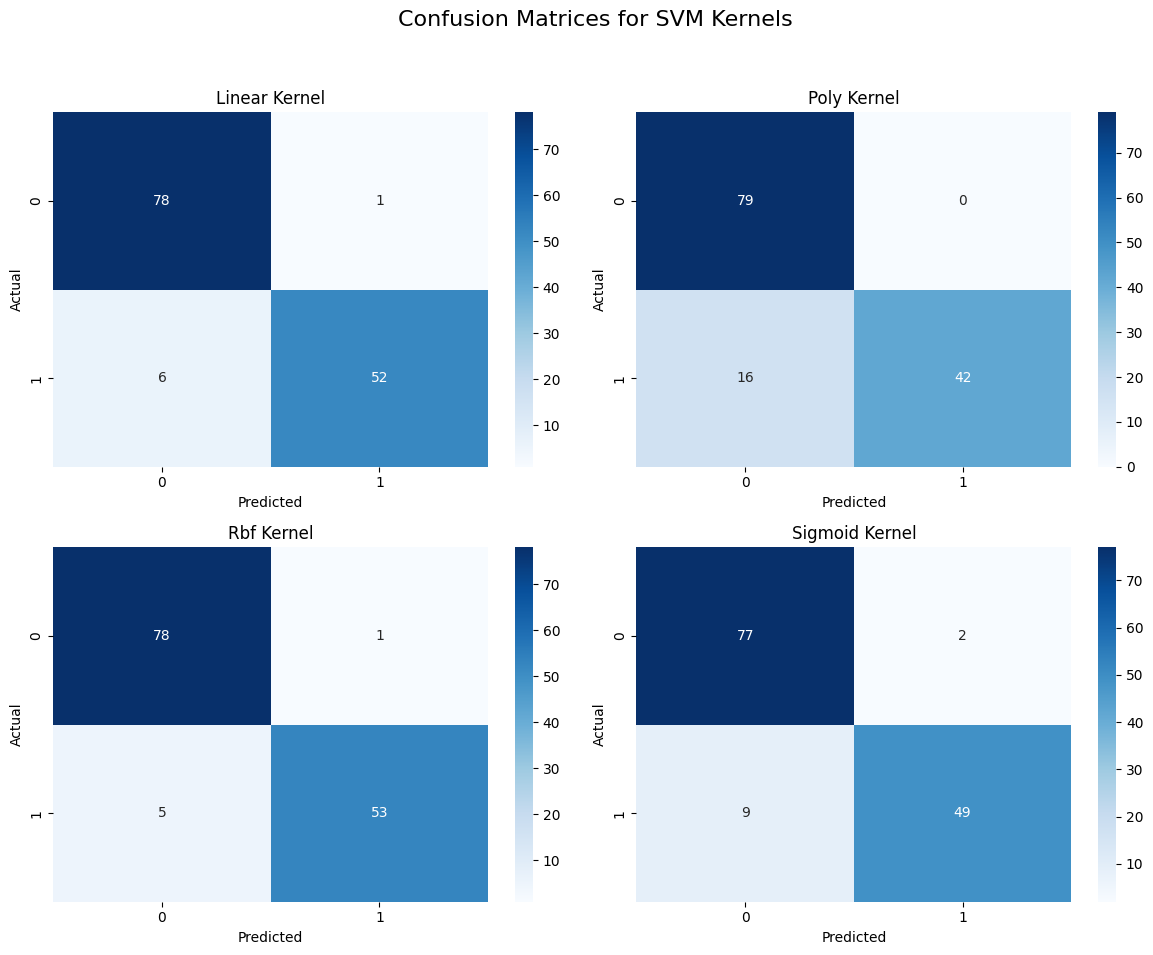

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('samples_cancer.csv')

df.drop(columns=['ID'] , inplace=True)

df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)

df.replace("?", np.nan , inplace=True )
df.dropna(inplace=True)

x=df.iloc[:, :-1]
y=df.iloc[:, -1]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 42)

x_train = scaler().fit_transform(x_train)
x_test = scaler().fit_transform(x_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
metrix = []

for k in kernels:
    print(f"training with {k} kernel..")
    model=SVC(kernel=k, probability=True)
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    y_prob=model.predict_proba(x_test)[:,-1]
    acc=accuracy_score(y_test, y_pred)
    recall= recall_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    f1=f1_score(y_test,y_pred)
    jaccard=jaccard_score(y_test, y_pred)
    error=1-acc
    conf_matrix= confusion_matrix(y_test, y_pred)
    
    metrix.append({
        'kernel':k,
        'accuracy':acc,
        'recall':recall,
        'precision':precision,
        'f1_score':f1,
        'jaccard_score':jaccard,
        'error_rate':error,
        'confusion_matrix':conf_matrix
    })
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{k}, (auc={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# display the metrics in a table
metrics_df = pd.DataFrame(metrix)
metrics_df_display = metrics_df.drop(columns=['confusion_matrix']).set_index('kernel').round(4)

fig, ax = plt.subplots(figsize=(10, 2.5))
ax.axis('off')
tbl = ax.table(cellText=metrics_df_display.values,
               colLabels=metrics_df_display.columns,
               rowLabels=metrics_df_display.index,
               loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
plt.title('SVM Kernel Performance Metrics')
plt.tight_layout()
plt.show()

# Plot confusion matrices for each kernel
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for i, entry in enumerate(metrix):
    cm = entry['confusion_matrix']
    kernel = entry['kernel']
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'{kernel.capitalize()} Kernel')
    axs[i].set_xlabel('Predicted')
    axs[i].set_ylabel('Actual')

plt.suptitle('Confusion Matrices for SVM Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Performance Metrics:

         Accuracy  Recall  Precision  F1 Score  Jaccard  Error Rate     AUC
Kernel                                                                     
linear     0.9489  0.8966     0.9811    0.9369   0.8814      0.0511  0.9976
poly       0.8832  0.7241     1.0000    0.8400   0.7241      0.1168  0.9985
rbf        0.9562  0.9138     0.9815    0.9464   0.8983      0.0438  0.9963
sigmoid    0.9197  0.8448     0.9608    0.8991   0.8167      0.0803  0.9939


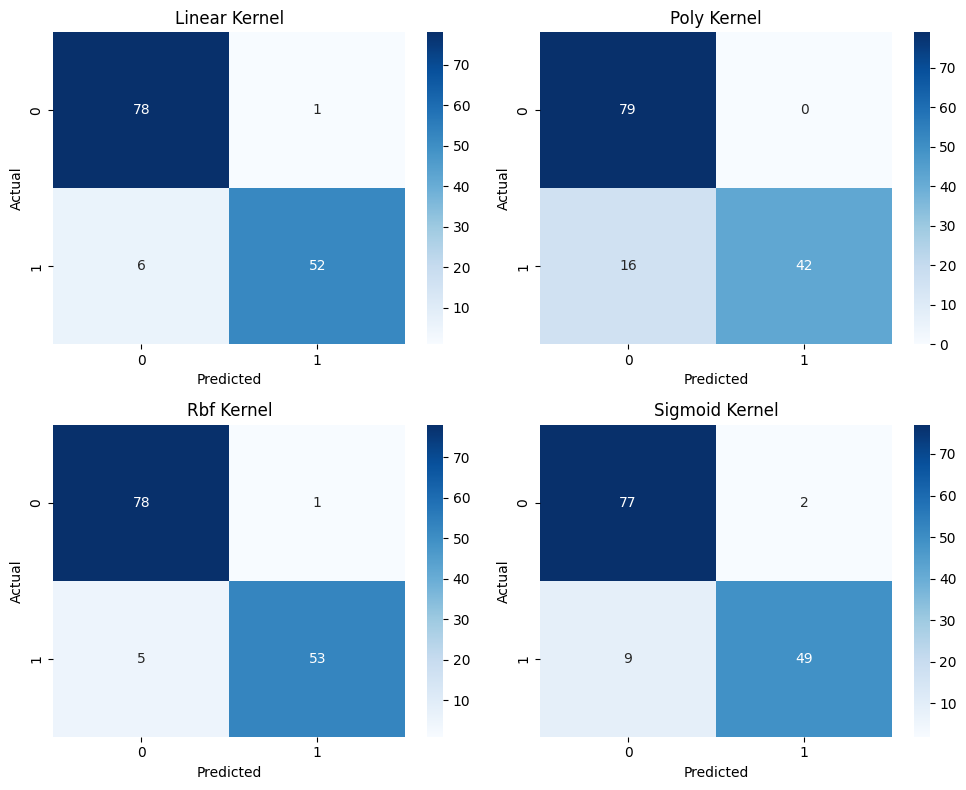

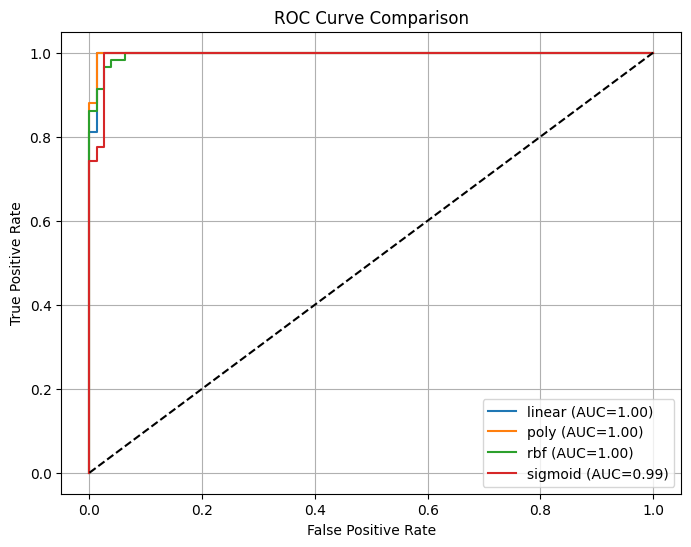

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

# Load and clean dataset
df = pd.read_csv('samples_cancer.csv')
df.drop(columns=['ID'], inplace=True)
df['Class'] = df['Class'].apply(lambda x: 1 if x == 4 else 0)
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric)

# Prepare features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Define SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

# Train and evaluate models
for k in kernels:
    model = SVC(kernel=k, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'Kernel': k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Jaccard': jaccard_score(y_test, y_pred),
        'Error Rate': 1 - accuracy_score(y_test, y_pred),
        'Conf Matrix': confusion_matrix(y_test, y_pred),
        'ROC': roc_curve(y_test, y_prob),
        'AUC': auc(*roc_curve(y_test, y_prob)[:2])
    })

# Display metrics as table
summary = pd.DataFrame([{k: v for k, v in r.items() if k not in ['Conf Matrix', 'ROC']} for r in results])
summary.set_index('Kernel', inplace=True)
print("\nPerformance Metrics:\n")
print(summary.round(4))

# Plot confusion matrices
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()
for i, r in enumerate(results):
    sns.heatmap(r['Conf Matrix'], annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f"{r['Kernel'].capitalize()} Kernel")
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(8, 6))
for r in results:
    fpr, tpr, _ = r['ROC']
    plt.plot(fpr, tpr, label=f"{r['Kernel']} (AUC={r['AUC']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


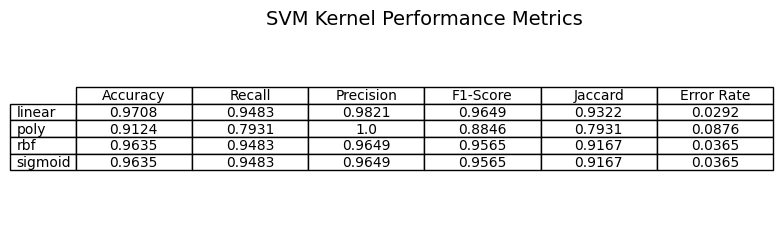

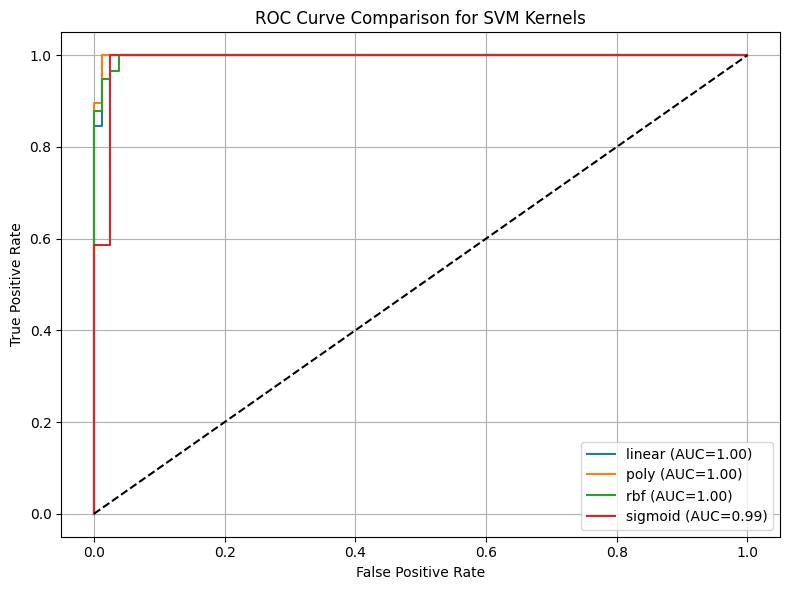

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, jaccard_score, roc_curve, auc

# Load and preprocess
df = pd.read_csv('samples_cancer.csv')
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df = df.drop(['ID'], axis=1).dropna()
X, y = df.drop('Class', axis=1), df['Class'].apply(lambda x: 1 if x == 4 else 0)
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.2, random_state=42)

# Train and evaluate SVMs
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results, roc_info = {}, {}
for k in kernels:
    m = SVC(kernel=k, probability=True).fit(X_train, y_train)
    p, prob = m.predict(X_test), m.predict_proba(X_test)[:,1]
    results[k] = [accuracy_score(y_test, p), recall_score(y_test, p),
                  precision_score(y_test, p), f1_score(y_test, p),
                  jaccard_score(y_test, p), 1 - accuracy_score(y_test, p)]
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_info[k] = (fpr, tpr, auc(fpr, tpr))

# Plot metrics table
metrics_df = pd.DataFrame(results, index=['Accuracy','Recall','Precision','F1-Score','Jaccard','Error Rate']).T.round(4)
fig, ax = plt.subplots(figsize=(9, 2.5))
ax.axis('off')
table = ax.table(cellText=metrics_df.values, colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title('SVM Kernel Performance Metrics', fontsize=14)
plt.savefig("svm_metrics_table.png", dpi=300, bbox_inches='tight')
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for k, (fpr, tpr, auc_val) in roc_info.items():
    plt.plot(fpr, tpr, label=f'{k} (AUC={auc_val:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig("svm_roc_curve_comparison.png", dpi=300)
plt.show()



Kernel: linear
Accuracy: 0.9708
Recall: 0.9483
Precision: 0.9821
F1-Score: 0.9649
Jaccard: 0.9322
Error Rate: 0.0292
Confusion Matrix:
[[78  1]
 [ 3 55]]

Kernel: poly
Accuracy: 0.9197
Recall: 0.8103
Precision: 1.0000
F1-Score: 0.8952
Jaccard: 0.8103
Error Rate: 0.0803
Confusion Matrix:
[[79  0]
 [11 47]]

Kernel: rbf
Accuracy: 0.9635
Recall: 0.9483
Precision: 0.9649
F1-Score: 0.9565
Jaccard: 0.9167
Error Rate: 0.0365
Confusion Matrix:
[[77  2]
 [ 3 55]]

Kernel: sigmoid
Accuracy: 0.9562
Recall: 0.9310
Precision: 0.9643
F1-Score: 0.9474
Jaccard: 0.9000
Error Rate: 0.0438
Confusion Matrix:
[[77  2]
 [ 4 54]]


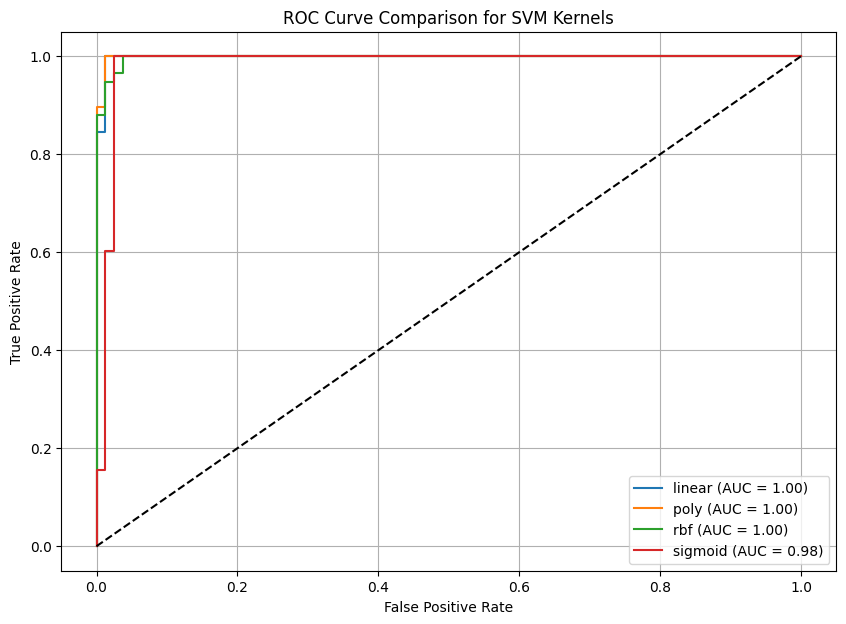

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('samples_cancer.csv')

# Rename columns if needed
df.columns = ['ID','Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit','Class']

# Drop ID
df = df.drop(['ID'], axis=1)

# Convert BareNuc to numeric (if needed)
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

# Handle missing values (drop or fill)
df.dropna(inplace=True)

# Separate features and labels
X = df.drop(['Class'], axis=1)
y = df['Class'].apply(lambda x: 1 if x == 4 else 0)  # Malignant = 1, Benign = 0

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Jaccard': jaccard_score(y_test, y_pred),
        'Error Rate': 1 - accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'ROC Curve': roc_curve(y_test, y_prob)
    }

# Print results
for kernel, metrics in results.items():
    print(f"\nKernel: {kernel}")
    for metric, value in metrics.items():
        if metric == 'Confusion Matrix':
            print(f"{metric}:\n{value}")
        elif metric != 'ROC Curve':
            print(f"{metric}: {value:.4f}")

# Plot ROC Curves
plt.figure(figsize=(10, 7))
for kernel, metrics in results.items():
    fpr, tpr, _ = metrics['ROC Curve']
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


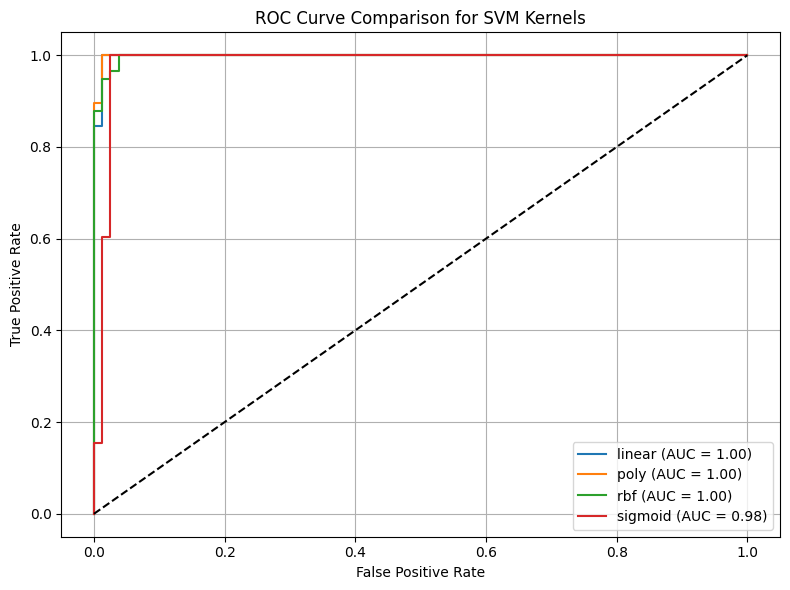

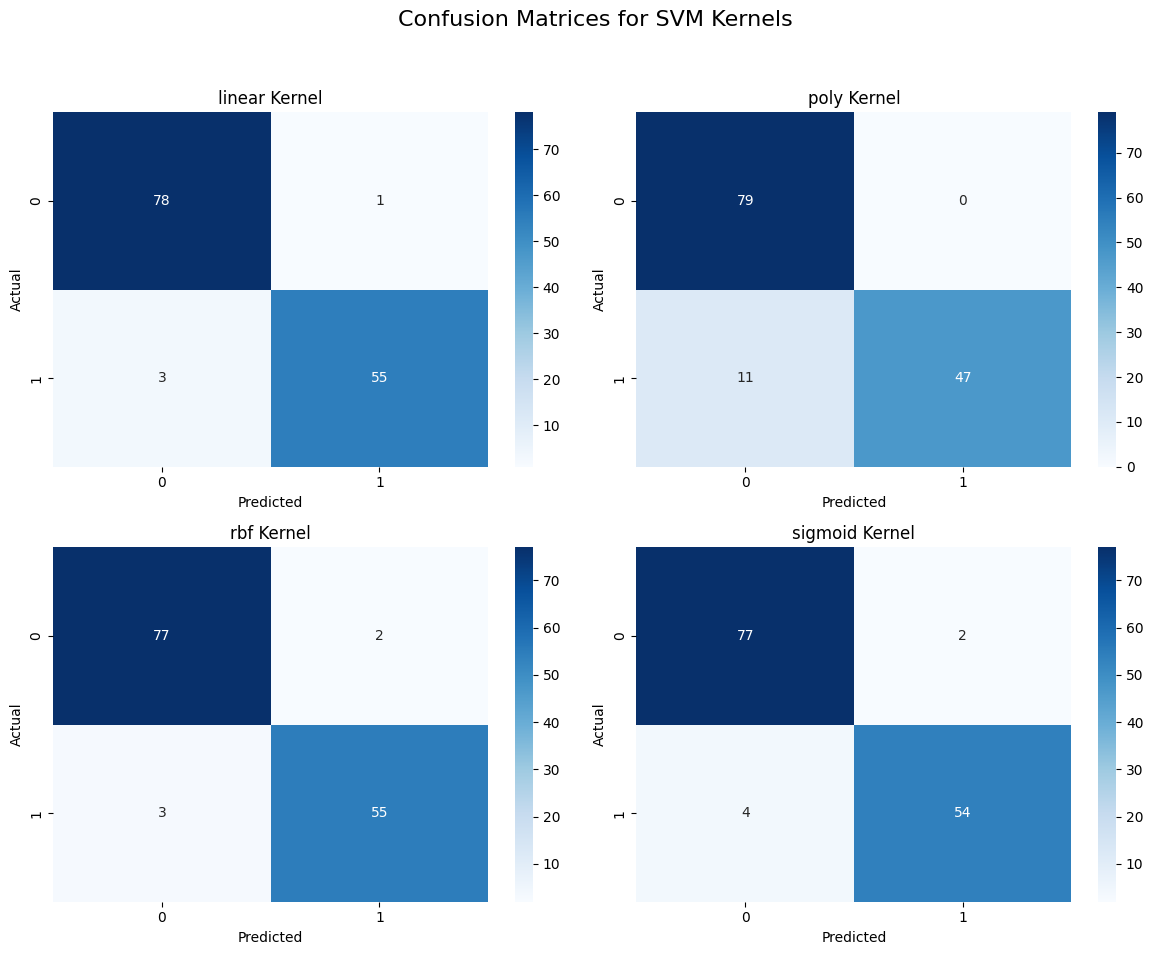

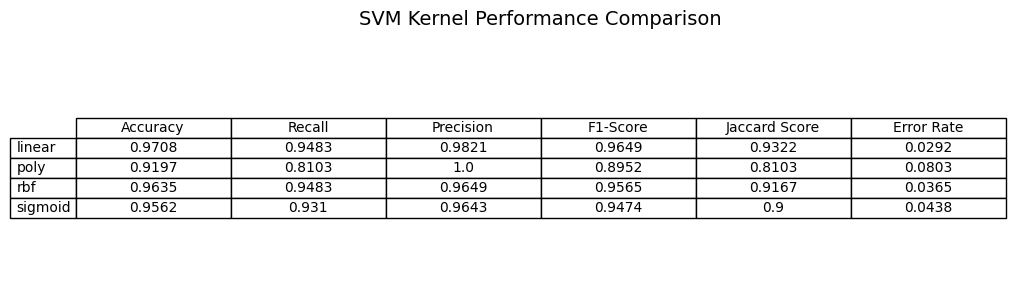

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)
import seaborn as sns

# Load and preprocess dataset
df = pd.read_csv('samples_cancer.csv')
df.columns = ['ID','Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit','Class']
df = df.drop(['ID'], axis=1)
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
df.dropna(inplace=True)

X = df.drop(['Class'], axis=1)
y = df['Class'].apply(lambda x: 1 if x == 4 else 0)  # Malignant = 1, Benign = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}
roc_data = {}
conf_matrices = {}

for kernel in kernels:
    model = SVC(kernel=kernel, probability=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results[kernel] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Jaccard': jaccard_score(y_test, y_pred),
        'Error Rate': 1 - accuracy_score(y_test, y_pred),
    }

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[kernel] = (fpr, tpr, auc(fpr, tpr))
    conf_matrices[kernel] = confusion_matrix(y_test, y_pred)

# ------------------ 📉 ROC Curve Plot ------------------
plt.figure(figsize=(8, 6))
for kernel, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison for SVM Kernels')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('svm_roc_curve_comparison.png', dpi=300)
plt.show()

# ------------------ 🧊 Confusion Matrices ------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for idx, kernel in enumerate(kernels):
    sns.heatmap(conf_matrices[kernel], annot=True, fmt='d', cmap='Blues', ax=axs[idx])
    axs[idx].set_title(f'{kernel} Kernel')
    axs[idx].set_xlabel('Predicted')
    axs[idx].set_ylabel('Actual')

plt.suptitle('Confusion Matrices for SVM Kernels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('svm_confusion_matrices.png', dpi=300)
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results_dict).T.round(4)

# Plotting the results table
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values,
                 colLabels=results_df.columns,
                 rowLabels=results_df.index,
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.title("SVM Kernel Performance Comparison", fontsize=14, pad=20)
plt.savefig("svm_kernel_metrics_table.png", dpi=300, bbox_inches='tight')
plt.show()